In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-data/Adult content dataset/desktop.ini
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/desktop.ini
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/desktop.ini
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (1107).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (1445).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (672).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (2278).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (764).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (500).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (1002).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (1169).jpg
/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1/2/test3 (508).jpg
/kaggle/input/adult-data/Adul

In [ ]:
# Save the model to a file
model.save('final_model.h5')
print("Model saved as 'final_model.h5'")


In [ ]:
# Evaluate the model on validation data (or test data)
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('final_model.h5')

val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_dir)
print(f"Validation Accuracy: {val_accuracy}")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a validation ImageDataGenerator
val_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images to [0, 1]

# Flow the validation data from the directory
  # Path to your validation directory
val_dataset = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),  # Resize to match the input size of the model
    batch_size=32,
    class_mode='binary',  # 'binary' for two classes (Normal, Adult)
    shuffle=False  # Do not shuffle during validation
)


In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])


In [ ]:
model = tf.keras.models.load_model('/kaggle/working/final_model.h5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])


In [ ]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_data)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation data
predictions = model.predict(val_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_dataset.classes


cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.class_indices.keys(), yticklabels=val_dataset.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for each class
# y_prob = model.predict(val_dataset)
y_prob = predictions
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_classes, y_prob[:, 1])  # Assuming binary classification
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Found 6252 images belonging to 2 classes.
Found 6220 images belonging to 2 classes.
Found 6203 images belonging to 2 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.8637 - loss: 0.3265 - precision: 0.8650 - recall: 0.8573 - val_accuracy: 0.5064 - val_loss: 0.9036 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 105s 521ms/step - accuracy: 0.9404 - loss: 0.1678 - precision: 0.9370 - recall: 0.9406 - val_accuracy: 0.7986 - val_loss: 0.5517 - val_precision: 0.7553 - val_recall: 0.8756 - learning_rate: 0.0010
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 105s 521ms/step - accuracy: 0.9441 - loss: 0.1432 - precision: 0.9433 - recall: 0.9361 - val_accuracy: 0.8752 - val_loss: 0.3316 - val_precision: 0.8591 - val_recall: 0.8938 - learning_rate: 0.0010
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 105s 522ms/step - accuracy: 0.9485 - loss: 0.1317 - precision: 0.9486 - recall: 0.9466 - val_accuracy: 0.8849 - val_loss: 0.3834 - val_precision: 0.9207 - val_recall: 0.8391 - learning_rate: 0.0010
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 106s 525ms/ste

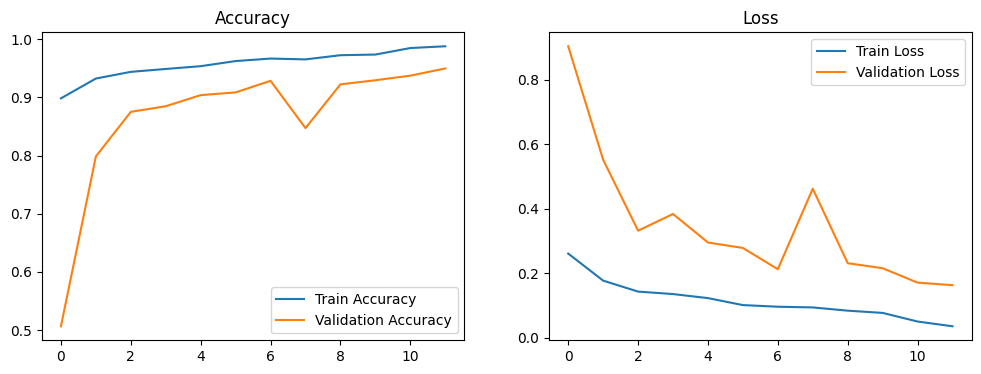

In [2]:

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to datasets
train_dir = '/kaggle/input/adult-data/Adult content dataset/P2datasetFull/train'
val_dir = '/kaggle/input/adult-data/Adult content dataset/P2datasetFull/val1'
test_dir = '/kaggle/input/adult-data/Adult content dataset/P2datasetFull/test1'

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 12
LEARNING_RATE = 0.001

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Backbone Model with Pretrained Weights
base_model = EfficientNetB3(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3))

# Attention Mechanism (SE Block)
def se_block(input_tensor, reduction=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // reduction, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    return Multiply()([input_tensor, se])

# Build the Model
inputs = Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs)
x = se_block(x)  # Apply attention
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the Model
results = model.evaluate(test_data)
print("Test Loss, Test Accuracy:", results)

# Save the Model
model.save('/kaggle/working/nsfw_classifier.h5')

# Visualize Training Performance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [3]:
# After training the model
model.save('/kaggle/working/nsfw_classifier.keras')
